# Image Segmentation Using K-Means Clustering

## Import Libraries

In [1]:
import cv2
import kmeans
import matplotlib.pyplot as plt

## Import Test Image

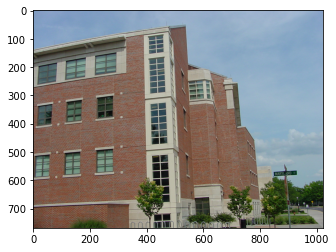

In [2]:
image = cv2.imread("images/building.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)